## Import libraries 

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [217]:
import warnings

warnings.filterwarnings('ignore')

## Reading data files and combining them into one data frame

In [218]:
train_data = pd.read_csv('titanic.csv')
test_data = pd.read_csv('test.csv')

combined_data = pd.concat([train_data,test_data])
combined_data

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,sibSp
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0,24160,211.3375,B5,S,1.0,NaN
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2,113781,151.5500,C22 C26,S,1.0,NaN
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2,113781,151.5500,C22 C26,S,0.0,NaN
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2,113781,151.5500,C22 C26,S,0.0,NaN
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2,113781,151.5500,C22 C26,S,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0000,NaN,0,W.E.P. 5734,61.1750,E31,S,NaN,1.0
15,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0000,NaN,0,SC/PARIS 2167,27.7208,NaN,C,NaN,1.0
16,2,"Keane, Mr. Daniel",male,35.0000,NaN,0,233734,12.3500,NaN,Q,NaN,0.0
17,3,"Assaf, Mr. Gerios",male,21.0000,NaN,0,2692,7.2250,NaN,C,NaN,0.0


## Information about the data (columns' data type and null values)

In [219]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 18
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1328 non-null   int64  
 1   name      1328 non-null   object 
 2   sex       1328 non-null   object 
 3   age       1064 non-null   float64
 4   sibsp     1309 non-null   float64
 5   parch     1328 non-null   int64  
 6   ticket    1328 non-null   object 
 7   fare      1327 non-null   float64
 8   cabin     297 non-null    object 
 9   embarked  1326 non-null   object 
 10  survived  1309 non-null   float64
 11  sibSp     19 non-null     float64
dtypes: float64(5), int64(2), object(5)
memory usage: 134.9+ KB


# Dropping redundant columns
columns with no predective power

In [220]:
combined_data.drop(['name','ticket','sibSp','sibsp','parch','cabin'],axis=1, inplace=True)
combined_data.head()

,pclass,sex,age,fare,embarked,survived
0,1,female,29.0000,211.3375,S,1.0
1,1,male,0.9167,151.5500,S,1.0
2,1,female,2.0000,151.5500,S,0.0
3,1,male,30.0000,151.5500,S,0.0
4,1,female,25.0000,151.5500,S,0.0


# Statistics information of data


In [221]:
combined_data.describe()

,pclass,age,fare,survived
count,1328.000000,1064.000000,1327.000000,1309.000000
mean,2.296687,29.927788,33.106063,0.381971
std,0.836753,14.413728,51.464510,0.486055
min,1.000000,0.166700,0.000000,0.000000
25%,2.000000,21.000000,7.895800,0.000000
50%,3.000000,28.000000,14.454200,0.000000
75%,3.000000,39.000000,31.137500,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [222]:
missing_values = combined_data.isnull().sum()
missing_values

pclass        0
sex           0
age         264
fare          1
embarked      2
survived     19
dtype: int64

# Handling columns with messing values

In [223]:
combined_data['age'].fillna(combined_data['age'].mean(), inplace=True)
combined_data['age']=combined_data['age'].round()
combined_data['age'] = combined_data['age'].astype(int)

combined_data['embarked'].fillna(combined_data['embarked'].mode()[0], inplace=True)
combined_data['fare'].fillna(0, inplace=True)


missing_values = combined_data.isnull().sum()
missing_values

pclass       0
sex          0
age          0
fare         0
embarked     0
survived    19
dtype: int64

# Viewing outliers in data and handling them

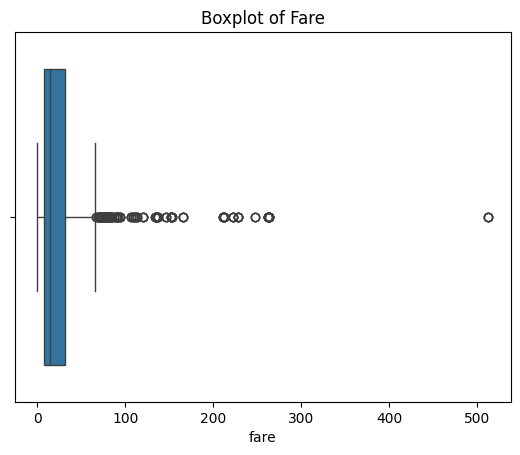

In [224]:
# Visualize outliers using boxplots
sns.boxplot(data=combined_data, x='fare')
plt.title('Boxplot of Fare')
plt.show()

combined_data['fare'] = np.log1p(combined_data['fare'])


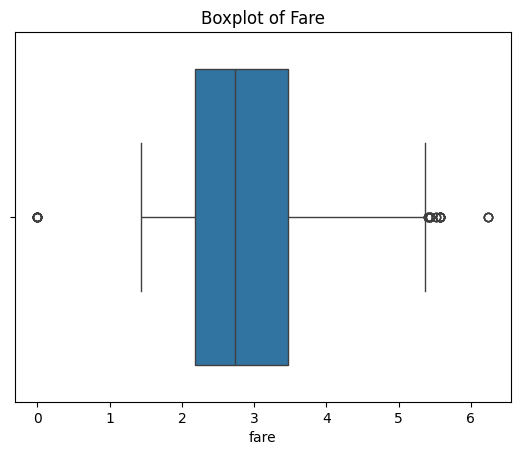

In [225]:
# Visulaize data after handling
sns.boxplot(data=combined_data, x='fare')
plt.title('Boxplot of Fare')
plt.show()


# Frequency distribution of values in variables

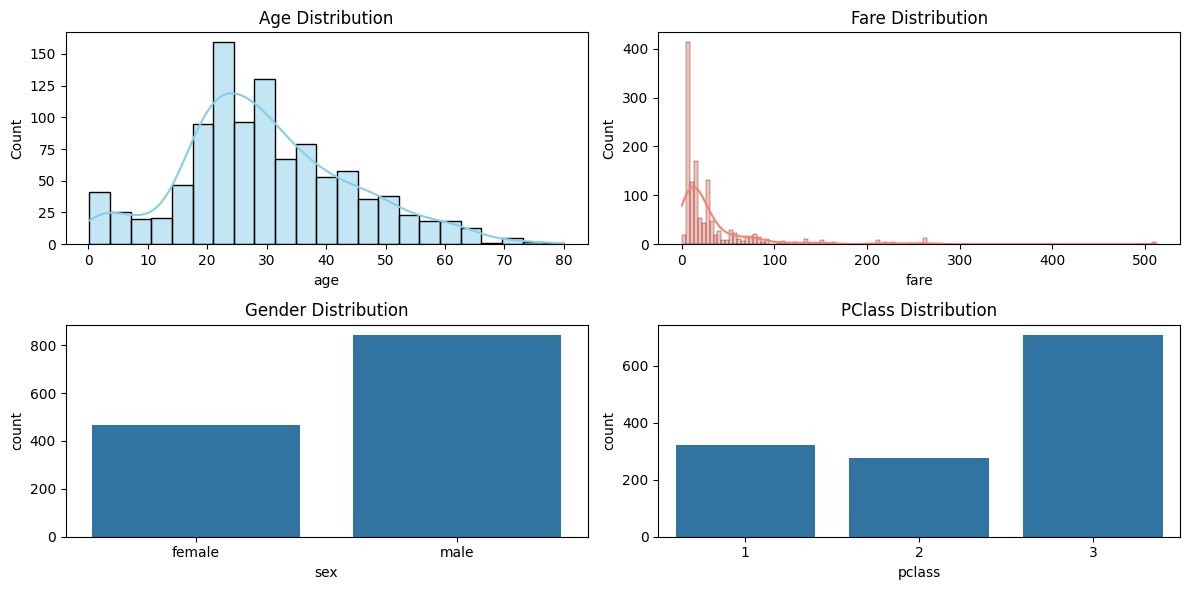

In [226]:
numerical_col=train_data.select_dtypes(include=[np.number])

# Distribution plots
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(train_data['age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.subplot(2, 2, 2)
sns.histplot(train_data['fare'], kde=True, color='salmon')
plt.title('Fare Distribution')
plt.subplot(2, 2, 3)
sns.countplot(data=train_data, x='sex')
plt.title('Gender Distribution')
plt.subplot(2, 2, 4)
sns.countplot(data=train_data, x='pclass')
plt.title('PClass Distribution')
plt.tight_layout()
plt.show()


# Correlation analysis

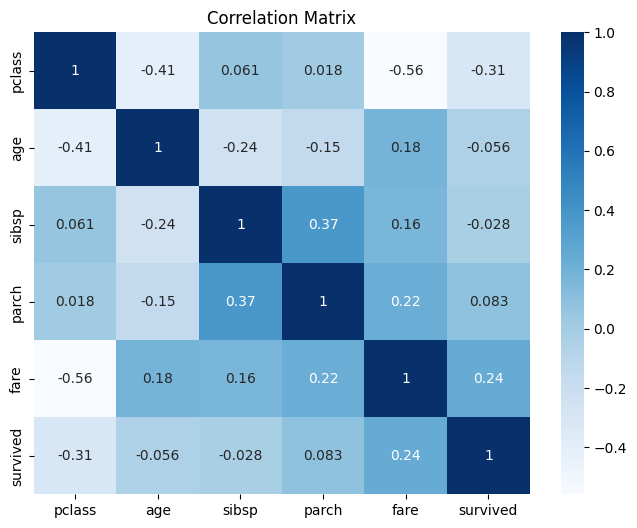

In [227]:
correlation = numerical_col.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

# Survival analysis

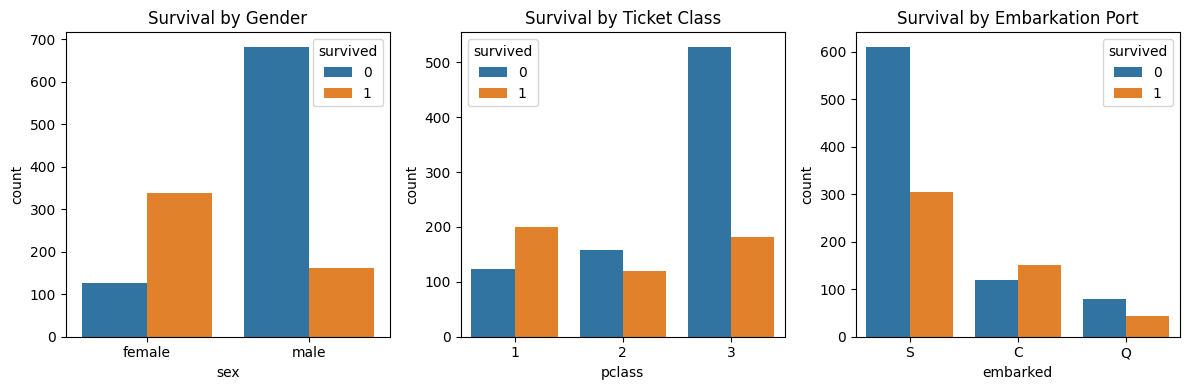

In [228]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.countplot(data=train_data, x='sex', hue='survived')
plt.title('Survival by Gender')
plt.subplot(1, 3, 2)
sns.countplot(data=train_data, x='pclass', hue='survived')
plt.title('Survival by Ticket Class')
plt.subplot(1, 3, 3)
sns.countplot(data=train_data, x='embarked', hue='survived')
plt.title('Survival by Embarkation Port')
plt.tight_layout()
plt.show()

# Encoding Categorical columns

In [229]:
categorical_columns = ['sex', 'embarked']

# Create dummy variables for the categorical columns
dummy_variables = pd.get_dummies(combined_data[categorical_columns], drop_first=True)

# Combine the dummy variables with the numerical columns
combined_data= pd.concat([combined_data.drop(columns=categorical_columns), dummy_variables], axis=1)

combined_data

,pclass,age,fare,survived,sex_male,embarked_Q,embarked_S
0,1,29,5.358177,1.0,False,False,True
1,1,1,5.027492,1.0,True,False,True
2,1,2,5.027492,0.0,False,False,True
3,1,30,5.027492,0.0,True,False,True
4,1,25,5.027492,0.0,False,False,True
...,...,...,...,...,...,...,...
14,1,47,4.129953,NaN,False,False,True
15,2,24,3.357622,NaN,False,False,False
16,2,35,2.591516,NaN,True,True,False
17,3,21,2.107178,NaN,True,False,False


# Spliting train and predict data

In [230]:
train_data =combined_data.iloc[0:1309]
Pred_data = combined_data.iloc[1309:]

Pred_data=Pred_data.drop(['survived'], axis=1)
Pred_data


,pclass,age,fare,sex_male,embarked_Q,embarked_S
0,3,34,2.178064,True,True,False
1,3,47,2.079442,False,False,True
2,2,62,2.369075,True,True,False
3,3,27,2.268252,True,False,True
4,3,22,2.586824,False,False,True
5,3,14,2.324836,True,False,True
6,3,30,2.155152,False,True,False
7,2,26,3.401197,True,False,True
8,3,18,2.107689,False,False,False
9,3,21,3.224858,True,False,True


In [231]:
X = train_data.drop(['survived'], axis=1)
y =train_data['survived']


# Split data into train and test sets

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Data Scaling

In [233]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# KNN model using different metrics and k values

In [234]:
best_f1_score = 0
best_accuracy_score = 0
best_recall=0
best_precision=0
best_k = None
best_metric = None

distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
k_values = [3, 5, 7, 9, 11]

# Iterate over different distance metrics
for metric in distance_metrics:
    # Iterate over different k values
    for k in k_values:
        # Initialize KNN classifier with current metric and k value
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        
   
        f1 = f1_score(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        rec = recall_score(y_test,y_pred)
        pre = precision_score(y_test,y_pred)

        # Check for best metrics
        if f1 > best_f1_score:
            best_f1_score = f1
            best_k = k
            best_metric = metric

        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_k = k
            best_metric = metric    

        if rec > best_recall:
            best_recall =rec  
            best_k = k
            best_metric = metric  

        if pre > best_precision:
            best_precision = pre 
            best_k = k
            best_metric = metric       

print(f'Best k={best_k}, Best metric={best_metric}, Best F1-score={best_f1_score}')
print(f'Best k={best_k}, Best metric={best_metric}, Best Accuracy-score={best_accuracy_score}')
print(f'Best k={best_k}, Best metric={best_metric}, Best Recall-score={best_recall}')
print(f'Best k={best_k}, Best metric={best_metric}, Best Precision-score={best_precision}')


Best k=5, Best metric=manhattan, Best F1-score=0.6956521739130435
Best k=5, Best metric=manhattan, Best Accuracy-score=0.7595419847328244
Best k=5, Best metric=manhattan, Best Recall-score=0.6101694915254238
Best k=5, Best metric=manhattan, Best Precision-score=0.8481012658227848


In [235]:
best_k_classifier = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
best_k_classifier.fit(X_train_scaled,y_train)

print('accuracy of best knn model',best_k_classifier.score(X_train_scaled,y_train))

accuracy of best knn model 0.8510028653295129


# predicting on second file with best knn model

In [236]:
knn_prediction = best_k_classifier.predict(Pred_data)
knn_prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0.])

# Naive Bayes model

In [237]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

from sklearn import metrics
from sklearn.metrics import classification_report

print('\n',classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_score:", f1)




               precision    recall  f1-score   support

         0.0       0.77      0.79      0.78       144
         1.0       0.73      0.70      0.72       118

    accuracy                           0.75       262
   macro avg       0.75      0.75      0.75       262
weighted avg       0.75      0.75      0.75       262


Accuracy: 0.7519083969465649
Precision: 0.7345132743362832
Recall: 0.7033898305084746
F1_score: 0.7186147186147186


# predicting on second file with Naive Bayes

In [238]:
nb_predictions = nb_model.predict(Pred_data)
nb_predictions

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1.])

# SVM algorithm with various hyperparameters

In [239]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svm_classifier = SVC(max_iter=5000)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters found by grid search
print("Best hyperparameters:", grid_search.best_params_)

# Train SVM model with best hyperparameters on the full training set
best_svm_classifier = SVC(**grid_search.best_params_, max_iter=5000)
best_svm_classifier.fit(X_train_scaled, y_train)

# Evaluate performance on the test set
y_pred = best_svm_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print evaluation metrics
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
      

Best hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'poly'}

Accuracy: 0.7557251908396947
Precision: 0.7970238095238096
Recall: 0.734934086629002
F1 score: 0.7345491388044579


# Predicting on second file

In [240]:
svm_prediction= best_svm_classifier.predict(Pred_data)
svm_prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

# Comparing models analysis

In [241]:
# Define models
models = [('KNN', knn), ('Naive Bayes', nb_model), ('SVM', best_svm_classifier)]

# Initialize dictionaries to store evaluation metrics for each model
accuracy_dict = {}
precision_dict = {}
recall_dict = {}
f1_dict = {}

# Evaluate each model
for name, model in models:
    # Fit the model
    model.fit(X_train_scaled, y_train)
    # Predict on test data
    y_pred = model.predict(X_test_scaled)
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Store evaluation metrics in dictionaries
    accuracy_dict[name] = accuracy
    precision_dict[name] = precision
    recall_dict[name] = recall
    f1_dict[name] = f1

# Print evaluation metrics for each model
print("Evaluation Metrics:")
for name in accuracy_dict:
    print(f"Model: {name}")
    print(f"  Accuracy: {accuracy_dict[name]:.4f}")
    print(f"  Precision: {precision_dict[name]:.4f}")
    print(f"  Recall: {recall_dict[name]:.4f}")
    print(f"  F1 Score: {f1_dict[name]:.4f}")
    print()


Evaluation Metrics:
Model: KNN
  Accuracy: 0.7557
  Precision: 0.8462
  Recall: 0.5593
  F1 Score: 0.6735

Model: Naive Bayes
  Accuracy: 0.7519
  Precision: 0.7345
  Recall: 0.7034
  F1 Score: 0.7186

Model: SVM
  Accuracy: 0.7557
  Precision: 0.8857
  Recall: 0.5254
  F1 Score: 0.6596



In [283]:
from sklearn.model_selection import cross_val_score

# Define models
models = [('KNN', knn), ('Naive Bayes', nb_model), ('SVM', best_svm_classifier)]

# Evaluate each model using cross-validation
for name, model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f'{name}: Mean Accuracy = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}')

KNN: Mean Accuracy = 0.7918, Std = 0.0241
Naive Bayes: Mean Accuracy = 0.7593, Std = 0.0310
SVM: Mean Accuracy = 0.8156, Std = 0.0229


# ANN model

In [281]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=250)

# Train the model on the training set
mlp_classifier.fit(X_train_scaled, y_train)

# Evaluate performance on the test set
y_pred = mlp_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7862595419847328
Precision: 0.8112466124661246
Recall: 0.7703625235404896
F1-score: 0.7735802469135802


In [244]:
ANN_prediction = mlp_classifier.predict(Pred_data)
ANN_prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [277]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create MLPClassifier instance with early stopping
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam',
                               early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)

# Train the model on the training set
mlp_classifier.fit(X_train_scaled, y_train)

# Get the number of iterations
num_iterations = mlp_classifier.n_iter_

# Evaluate performance on the test set
y_pred = mlp_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the iteration on which training stopped
print("Training stopped on iteration:", num_iterations)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Training stopped on iteration: 29
Accuracy: 0.7595419847328244
Precision: 0.7954990215264188
Recall: 0.739936440677966
F1-score: 0.740483939436819
